Regression Analysis:(Any one)
A. Predict the price of the Uber ride from a given pickup point to the agreed drop-off 
location. Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and ridge, Lasso regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 1: Load the dataset
dataset = r"C:\Users\Sanskruti\Downloads\uber.csv"
data = pd.read_csv(dataset)
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
data_sampled = data.sample(frac=0.1, random_state=42)  # Use 10% of the data

In [4]:
# Step 2: Pre-process the dataset
# Convert pickup and drop-off datetime columns to datetime type
data_sampled['pickup_datetime'] = pd.to_datetime(data_sampled['pickup_datetime'])

In [5]:
# Extract features from datetime
data_sampled['hour'] = data_sampled['pickup_datetime'].dt.hour
data_sampled['day'] = data_sampled['pickup_datetime'].dt.day
data_sampled['month'] = data_sampled['pickup_datetime'].dt.month
data_sampled['year'] = data_sampled['pickup_datetime'].dt.year

In [6]:
# Handle missing values
data_sampled = data_sampled.dropna()

In [7]:
# Convert categorical data to numerical data (e.g., convert the 'pickup_location' and 'dropoff_location' to one-hot encoding)
data_sampled = pd.get_dummies(data_sampled, drop_first=True, sparse=True)

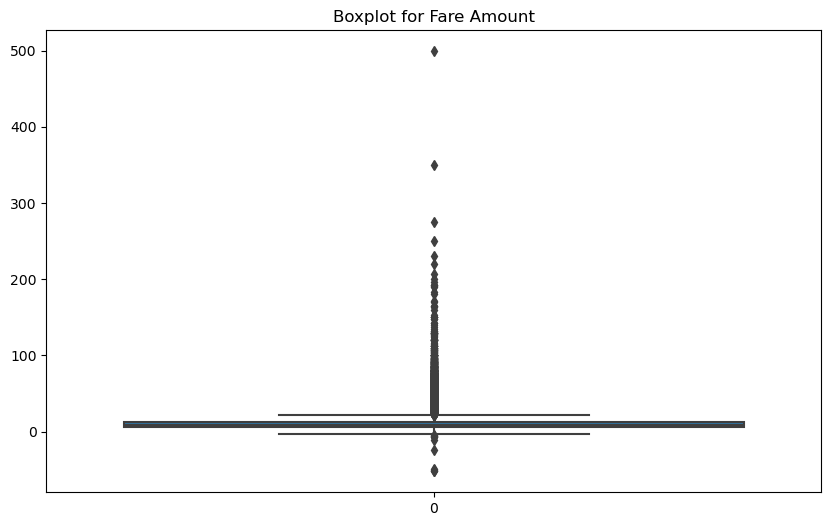

In [8]:
# Step 3: Identify outliers using boxplot visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data['fare_amount'])
plt.title('Boxplot for Fare Amount')
plt.show()

In [9]:
# Removing outliers using IQR
Q1 = data_sampled['fare_amount'].quantile(0.25)
Q3 = data_sampled['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
data_sampled = data_sampled[~((data_sampled['fare_amount'] < (Q1 - 1.5 * IQR)) | (data_sampled['fare_amount'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Step 4: Check correlation
plt.figure(figsize=(12, 8))
sns.heatmap(data_sampled.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Step 5: Split the dataset into features and target variable
X = data_sampled.drop(columns=['fare_amount', 'pickup_datetime'])
y = data_sampled['fare_amount']

In [11]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Step 7: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\Sanskruti\anaconda3\Lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Sanskruti\anaconda3\Lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Sanskruti\anaconda3\Lib\site-packages\sklearn\utils\validation.py:949: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):
C:\Users\Sanskruti\anaconda3\Lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Sanskruti\anaconda3\Lib\site-packages\sklearn\utils\validation.py:949: FutureWarning: Allowing arbitrar

In [ ]:
# Step 8: Implement Linear Regression, Ridge, and Lasso Regression Models
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [ ]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

In [ ]:
# Evaluate Linear Regression
evaluate_model(y_test, y_pred_lr, 'Linear Regression')

In [ ]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

In [ ]:
# Evaluate Ridge Regression
evaluate_model(y_test, y_pred_ridge, 'Ridge Regression')

In [ ]:
# Evaluate Lasso Regression
evaluate_model(y_test, y_pred_lasso, 'Lasso Regression')

In [ ]:
# Step 9: Evaluate the Models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} Performance:')
    print(f'R² Score: {r2:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print('-'*30)

In [ ]:
# Step 10: Compare the models
models_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'R² Score': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_ridge), r2_score(y_test, y_pred_lasso)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_ridge)), np.sqrt(mean_squared_error(y_test, y_pred_lasso))]
})

In [ ]:
print(models_comparison)